In [1]:
%matplotlib inline

In [2]:
from collections import namedtuple
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator import plot_resonator
from kid_readout.analysis.timeseries import iqnoise
from kid_readout.equipment import hpd_temps

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')

In [4]:
on_sss = npd.read('SingleSweepStream0')
off_ss = npd.read('SingleStream2')

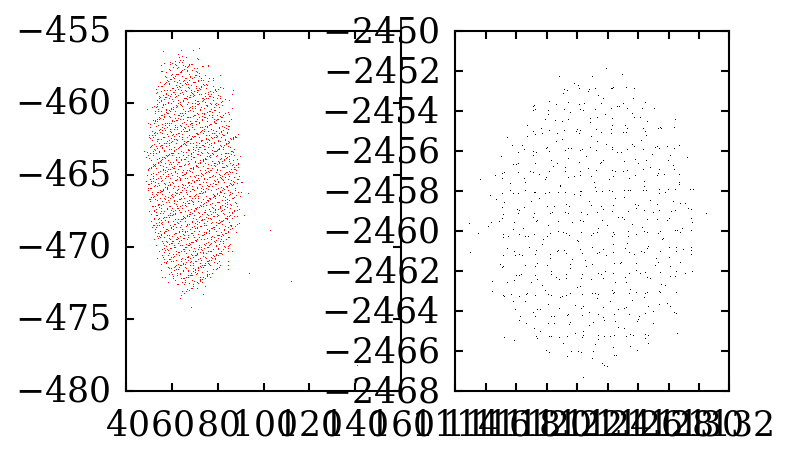

In [5]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(on_sss.stream.s21_raw.real, on_sss.stream.s21_raw.imag, ',r')
axes[1].plot(off_ss.s21_raw.real, off_ss.s21_raw.imag, ',k')

In [6]:
def plot_s21_on_off(on_ss, off_ss):
    fig, axes = plt.subplots(4, 1, figsize=(2, 4))
    axes[0].plot(on_ss.sample_time, on_ss.s21_raw.real, '-', color='red')
    axes[1].plot(on_ss.sample_time, on_ss.s21_raw.imag, '-', color='orange')
    axes[2].plot(off_ss.sample_time, off_ss.s21_raw.real, '-', color='blue')
    axes[3].plot(off_ss.sample_time, off_ss.s21_raw.imag, '-', color='green')
    return fig, axes

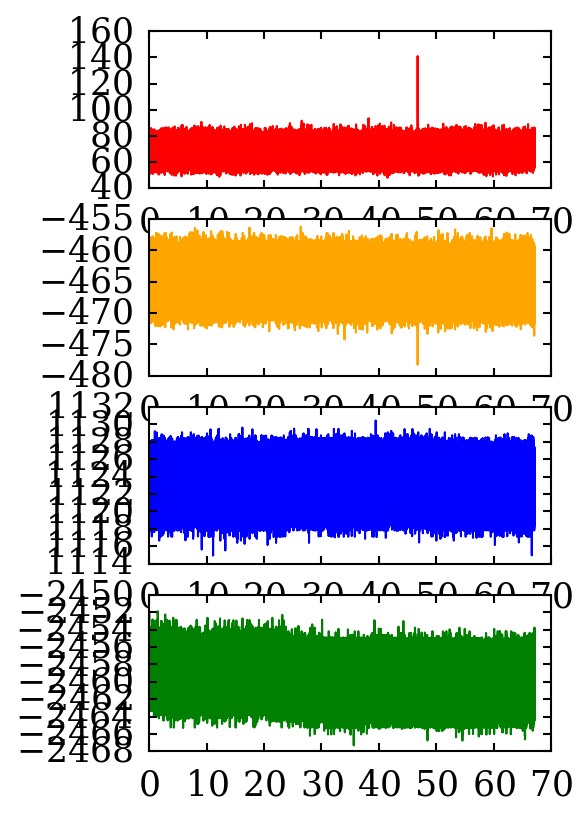

In [7]:
plot_s21_on_off(on_sss.stream, off_ss);

In [8]:
temps = hpd_temps.get_temperatures_at(off_ss.epoch + off_ss.sample_time)

In [9]:
package = temps[0]
package.mean()

0.12190818761808377

In [10]:
package_fluctuation_uK = 1e6 * (package - 0.122)

In [11]:
on_sss.set_stream_s21_normalized_deglitched(window_in_seconds=1, deglitch_threshold=2.0)
on_sss.set_q_and_x(deglitch=True)

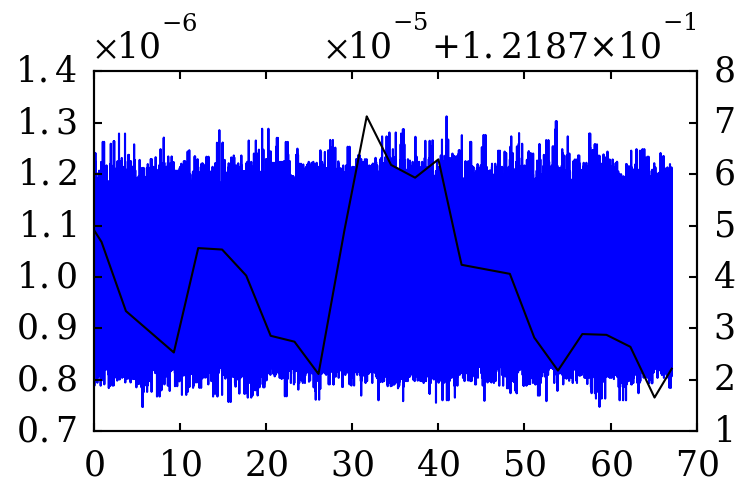

In [12]:
fig, x_ax = plt.subplots()
T_ax = x_ax.twinx()
x_ax.plot(on_sss.stream.sample_time, on_sss.x, color='blue')
T_ax.plot(on_sss.stream.sample_time, package, color='black')

#x_ax.set_ylim(-2e-6, 2e-6);

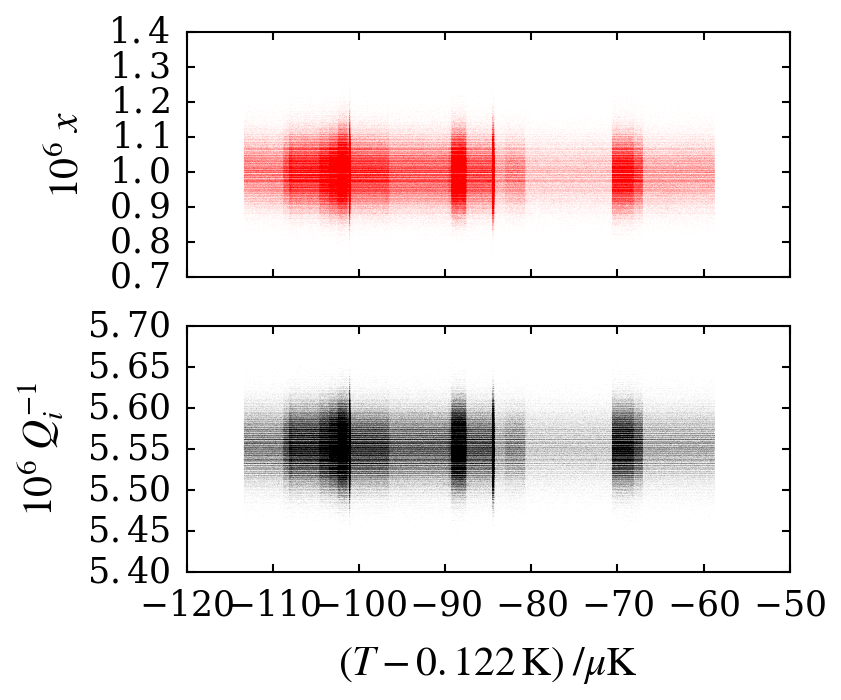

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(3, 3), sharex=True)
axes[0].set_ylabel('$10^6 \; x$')
axes[1].set_ylabel('$10^6 \; Q_i^{-1}$')
axes[1].set_xlabel('$(T - 0.122 \, \mathrm{K}) \; / \mu \mathrm{K}$')

axes[0].plot(package_fluctuation_uK, 1e6 * on_sss.x, ',r', alpha=0.01)
axes[1].plot(package_fluctuation_uK, 1e6 * on_sss.y, ',k', alpha=0.01)
#axes[0].set_ylim(-0.5, 1)
#axes[1].set_ylim(52.3, 53.3);

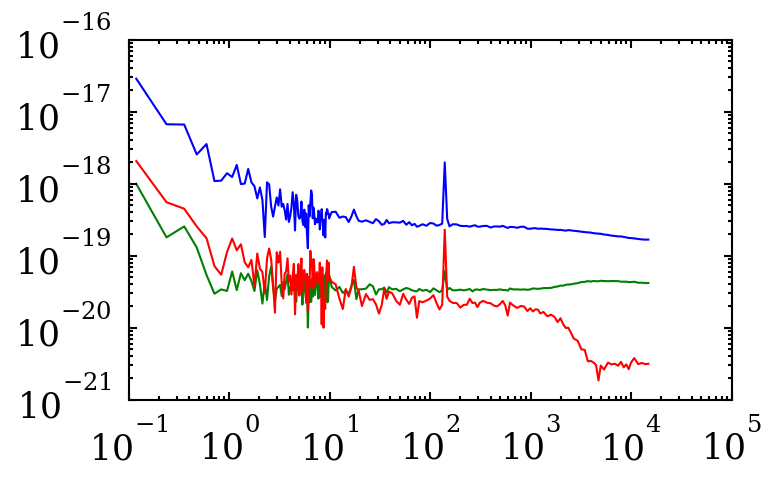

In [14]:
fig, ax = plt.subplots()
ax.loglog(on_sss.S_frequency, on_sss.S_xx)
ax.loglog(on_sss.S_frequency, on_sss.S_yy)
ax.loglog(on_sss.S_frequency, np.abs(on_sss.S_xy))

In [15]:
on = iqnoise.auto_auto_cross(X=on_sss.stream.s21_raw.real, Y=on_sss.stream.s21_raw.imag,
                             sample_rate=on_sss.stream.stream_sample_rate)
off = iqnoise.auto_auto_cross(X=off_ss.s21_raw.real, Y=off_ss.s21_raw.imag,
                              sample_rate=off_ss.stream_sample_rate)

In [42]:
on_coh = np.abs(on.S_XY)**2 / (on.S_XX * on.S_YY)
off_coh = np.abs(off.S_XY)**2 / (off.S_XX * off.S_YY)

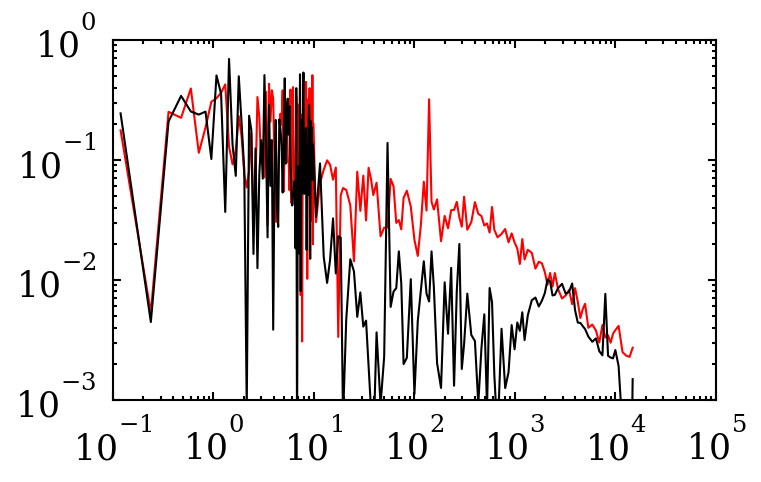

In [45]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(on.f, on_coh, '-r', label='on')
ax.plot(off.f, off_coh, '-k', label='off')
ax.set_ylim(1e-3, 1);